# GPR figure

*This notebook is to reproduce the results from the article. For more information see the article in the parent directory.*

=> The data is calculated in the notebook `gpr-create-data.ipynb`.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Style adjustments
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.serif'] = 'Computer Modern Roman'
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.style'] = 'normal'

## Load data

In [2]:
# 1. FHT
gprFHT = np.load('data/GPR-FHT.npy')

# 2. QWE
gprQWE = np.load('data/GPR-QWE.npy')

# 3. QUAD
gprQUA = np.load('data/GPR-QUA.npy')

# 4. EMmod
gprEMmod = np.load('data/GPR-EMmod.npy')

# 5. Arrival times
x = np.load('data/ArrivalTimes.npz')['x']
arrtime = np.load('data/ArrivalTimes.npz')['arrtime']
arrtimeref = np.load('data/ArrivalTimes.npz')['arrtimeref']
arrtimerefair = np.load('data/ArrivalTimes.npz')['arrtimerefair']

## Plot

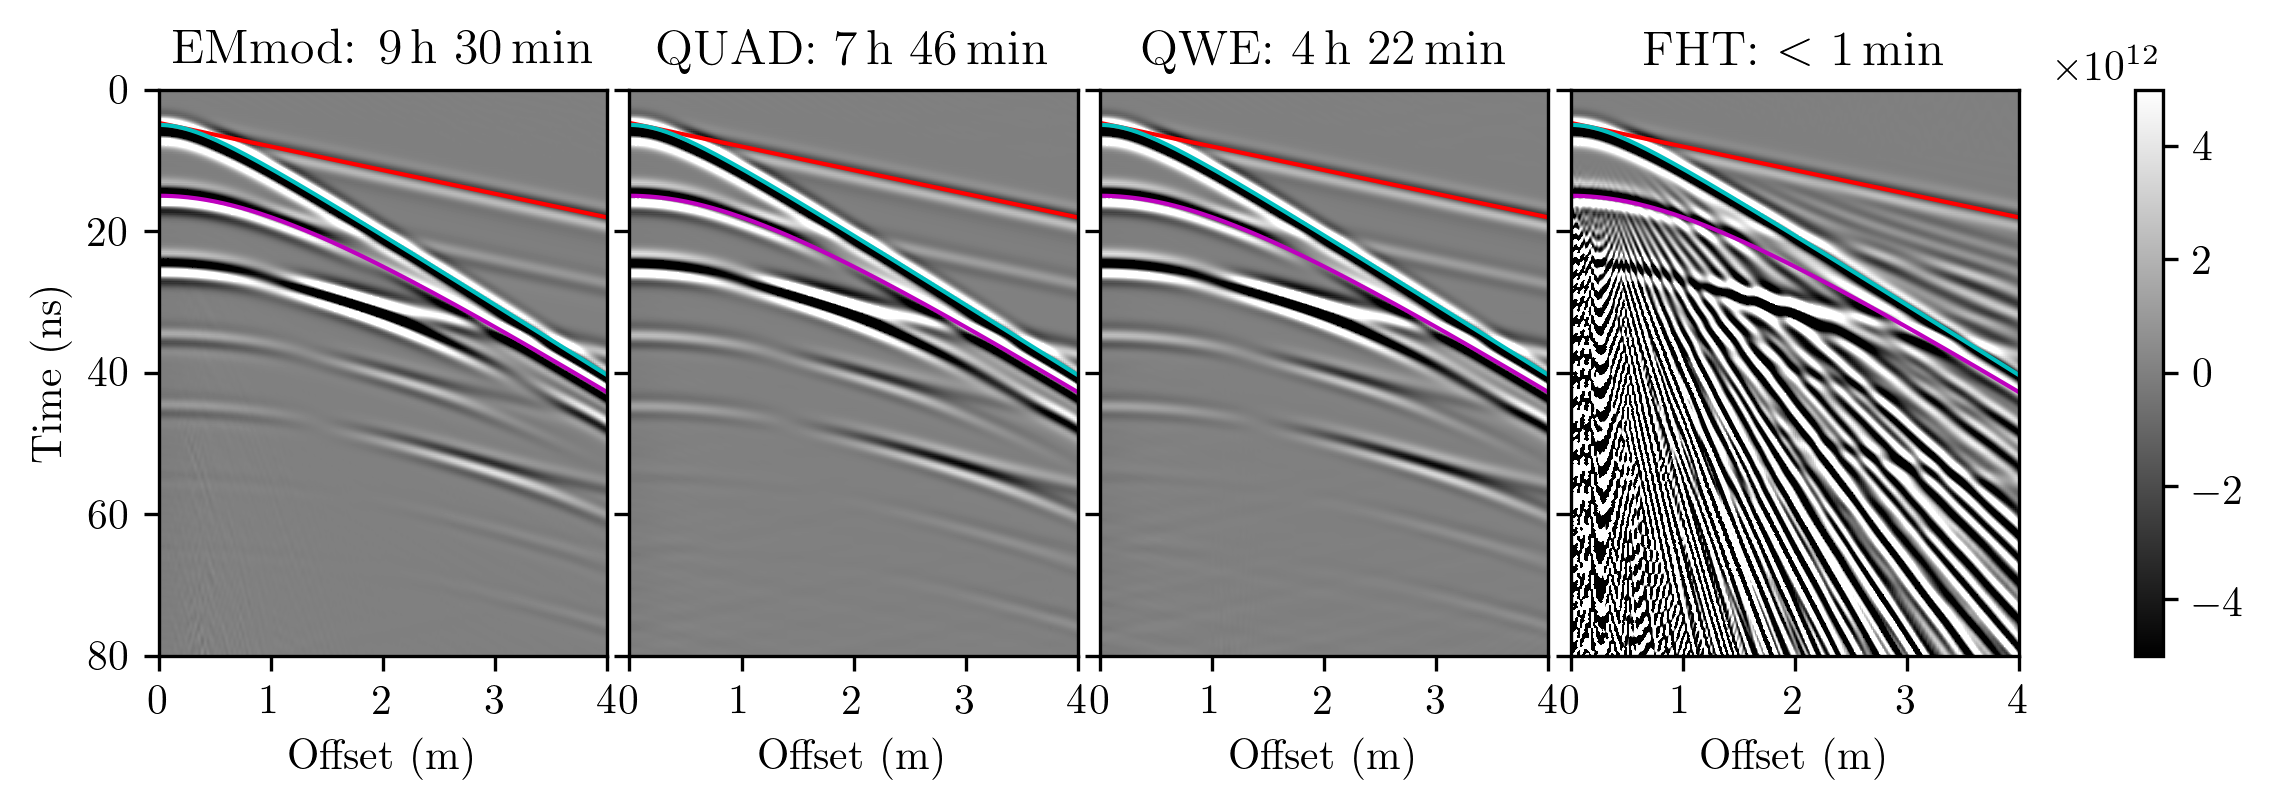

In [3]:
params = {'cmap':'gray', 'vmin':-.5*10**13, 'vmax':0.5*10**13, 'interpolation':'sinc',
          'extent':[0, 4, 80, 0], 'aspect':'auto'}

fig, axs = plt.subplots(figsize=(10, 2.5), facecolor = 'w', nrows=1, ncols=4, sharex=True, sharey=True)
fig.subplots_adjust(wspace=.05)
axs = axs.ravel() 

# Set axis and limits
def limits(i):
    plt.sca(axs[i])
    plt.plot(x, arrtimerefair*10**9, 'r', lw=1)
    plt.plot(x, arrtime*10**9, 'c', lw=1)
    plt.plot(x, arrtimeref*10**9, 'm', lw=1)
    plt.ylim([80, 0])
    plt.xlim([0, 4])
    plt.xlabel('Offset (m)')
    plt.xticks(np.arange(5))
    plt.grid('off')

# Plot EMmod
limits(0)
plt.title(r'EMmod: 9\,h 30\,min')
plt.imshow(gprEMmod, **params)
plt.ylabel('Time (ns)')

# Plot QUAD
limits(1)
plt.title(r'QUAD: 7\,h 46\,min')
plt.imshow(gprQUA, **params)

# Plot QWE
limits(2)
plt.title(r'QWE: 4\,h 22\,min')
plt.imshow(gprQWE, **params)

# Plot FHT
limits(3)
plt.title(r'FHT: $<$ 1\,min')
plt.imshow(gprFHT, **params)

# Plot colorbar
cax, kw = mpl.colorbar.make_axes([axs[0], axs[1], axs[2], axs[3]], location='right')
cb = plt.colorbar(cax=cax, **kw)

# Save figure and show it
#plt.savefig('../figures/gpr.jpg', bbox_inches='tight')
plt.show()